In [16]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [17]:
df = pd.read_excel("Questionnaire.xlsx", index_col = "SNO")
df.head(3)

,HOS ID NO,Age,Gender,Marit Status,Fam. Type,Religion,HLOE,Social Class,Income,Ethnicity,...,GE_dehydration,GE_Edema,ANT-Wt,ANT_Ht,BMI,Genotype,PCV,Clos_1,Clos_2,Clos_3
SNO,,,,,,,,,,,,,,,,,,,,,
1,327.0,39,NaN,1.0,Extended,1.0,4.0,3.0,52000.0,1.0,...,1.0,NaN,54,NaN,NaN,SS,27.0,NaN,3.0,"Respondent single, as such interview was not f..."
2,718.0,26,2.0,1.0,Polygamous,1.0,4.0,2.0,80000.0,2.0,...,NaN,NaN,,NaN,NaN,SS,23.0,Feel Delighted,2.0,NaN
3,800.0,56,1.0,2.0,Monogamous,2.0,4.0,3.0,80000.0,4.0,...,NaN,NaN,50,NaN,NaN,SS,30.0,NaN,NaN,Can help caregivers in taking care of SCD Pts


In [18]:
df.dtypes

HOS ID NO             float64
Age                     int64
Gender                float64
Marit Status          float64
Fam. Type              object
Religion              float64
HLOE                  float64
Social Class          float64
Income                float64
Ethnicity             float64
Age of Child          float64
Gender.1              float64
HLOE of Child         float64
No of Sib              object
No of Affected Sib     object
Dur of care           float64
Prev Hosp             float64
Prev BT               float64
VOC                   float64
IFB-A                 float64
IFB-B                 float64
IFB_C                 float64
IFB_Total             float64
IDFI_A                float64
IDFI_B                float64
IDFI_C                float64
IDFI_Total            float64
IDRFA_A               float64
IDRFA_B               float64
IDRFA_C               float64
IDRFA_D               float64
IDRFA_Total           float64
ICCA_A                float64
ICCA_B    

In [19]:
df.columns.values
# This converts the DataFrame into a NumPy array.

array(['HOS ID NO', 'Age', 'Gender', 'Marit Status', 'Fam. Type',
       'Religion', 'HLOE', 'Social Class', 'Income', 'Ethnicity',
       'Age of Child', 'Gender.1', 'HLOE of Child', 'No of Sib',
       'No of Affected Sib', 'Dur of care', 'Prev Hosp', 'Prev BT', 'VOC',
       'IFB-A', 'IFB-B', 'IFB_C', 'IFB_Total', 'IDFI_A', 'IDFI_B',
       'IDFI_C', 'IDFI_Total', 'IDRFA_A', 'IDRFA_B', 'IDRFA_C', 'IDRFA_D',
       'IDRFA_Total', 'ICCA_A', 'ICCA_B', 'ICCA_C', 'ICCA_D', 'ICCA_E',
       'ICCA_Total', 'GE_Palor', 'GE_Jaundice', 'GE_dehydration',
       'GE_Edema', 'ANT-Wt', 'ANT_Ht', 'BMI', 'Genotype', 'PCV', 'Clos_1',
       'Clos_2', 'Clos_3'], dtype=object)

In [20]:
df.shape

(67, 50)

In [21]:
df = df.drop(["HOS ID NO"], axis=1)
df.shape

(67, 49)

In [22]:
duplicates = df[df.duplicated()]
duplicates

,Age,Gender,Marit Status,Fam. Type,Religion,HLOE,Social Class,Income,Ethnicity,Age of Child,...,GE_dehydration,GE_Edema,ANT-Wt,ANT_Ht,BMI,Genotype,PCV,Clos_1,Clos_2,Clos_3
SNO,,,,,,,,,,,,,,,,,,,,,


In [23]:
df = df.drop_duplicates()
df.head(3)

,Age,Gender,Marit Status,Fam. Type,Religion,HLOE,Social Class,Income,Ethnicity,Age of Child,...,GE_dehydration,GE_Edema,ANT-Wt,ANT_Ht,BMI,Genotype,PCV,Clos_1,Clos_2,Clos_3
SNO,,,,,,,,,,,,,,,,,,,,,
1,39,NaN,1.0,Extended,1.0,4.0,3.0,52000.0,1.0,NaN,...,1.0,NaN,54,NaN,NaN,SS,27.0,NaN,3.0,"Respondent single, as such interview was not f..."
2,26,2.0,1.0,Polygamous,1.0,4.0,2.0,80000.0,2.0,7.0,...,NaN,NaN,,NaN,NaN,SS,23.0,Feel Delighted,2.0,NaN
3,56,1.0,2.0,Monogamous,2.0,4.0,3.0,80000.0,4.0,18.0,...,NaN,NaN,50,NaN,NaN,SS,30.0,NaN,NaN,Can help caregivers in taking care of SCD Pts


In [24]:
df.isnull().sum()

Age                    0
Gender                 3
Marit Status           1
Fam. Type             10
Religion               2
HLOE                   2
Social Class           7
Income                21
Ethnicity              2
Age of Child           3
Gender.1               2
HLOE of Child          3
No of Sib              4
No of Affected Sib     3
Dur of care            9
Prev Hosp              3
Prev BT                3
VOC                    3
IFB-A                  2
IFB-B                  2
IFB_C                  2
IFB_Total              2
IDFI_A                 2
IDFI_B                 2
IDFI_C                 2
IDFI_Total             2
IDRFA_A                2
IDRFA_B                2
IDRFA_C                2
IDRFA_D                2
IDRFA_Total            2
ICCA_A                 3
ICCA_B                 2
ICCA_C                 2
ICCA_D                 2
ICCA_E                 3
ICCA_Total             2
GE_Palor               9
GE_Jaundice           10
GE_dehydration         7


In [25]:
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 13 to 24
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 11 non-null     int64  
 1   Gender              11 non-null     float64
 2   Marit Status        11 non-null     float64
 3   Fam. Type           11 non-null     object 
 4   Religion            11 non-null     float64
 5   HLOE                11 non-null     float64
 6   Social Class        11 non-null     float64
 7   Income              11 non-null     float64
 8   Ethnicity           11 non-null     float64
 9   Age of Child        11 non-null     float64
 10  Gender.1            11 non-null     float64
 11  HLOE of Child       11 non-null     float64
 12  No of Sib           11 non-null     object 
 13  No of Affected Sib  11 non-null     object 
 14  Dur of care         11 non-null     float64
 15  Prev Hosp           11 non-null     float64
 16  Prev BT  

In [26]:
df.shape

(11, 49)

<AxesSubplot:xlabel='Age'>

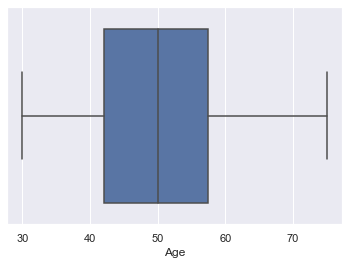

In [27]:
sns.boxplot(x=df["Age"])

<AxesSubplot:xlabel='Income'>

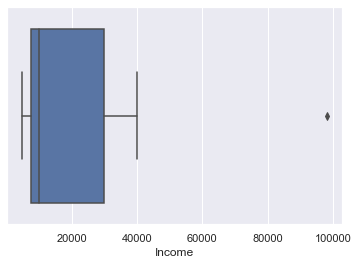

In [28]:
sns.boxplot(x=df["Income"])

Text(0, 0.5, 'Ethnicity')

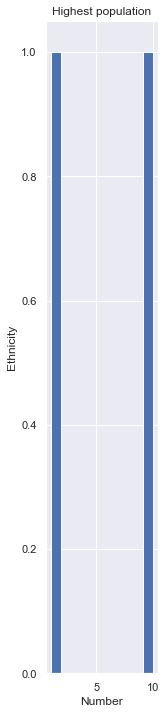

In [29]:
df.Ethnicity.value_counts().nlargest(2).plot(kind="hist", figsize=(2, 12))
plt.title("Highest population")
plt.xlabel("Number")
plt.ylabel("Ethnicity")

In [30]:
df["HLOE"]

SNO
13    3.0
14    3.0
15    2.0
16    2.0
17    4.0
19    3.0
20    3.0
21    3.0
22    3.0
23    3.0
24    3.0
Name: HLOE, dtype: float64